In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('data.csv')
df.head()


,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0


In [12]:
df.tail()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
939,0,7,7,1,6,4,73,6,24,1
940,0,7,5,2,6,6,50,6,24,1
941,0,3,6,2,7,5,43,6,24,1
942,0,6,6,2,5,6,46,7,24,1
943,18,7,4,2,6,3,61,7,24,1


In [13]:
df.shape

(944, 10)

In [17]:
df.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [19]:
df.dtypes

footfall       int64
tempMode       int64
AQ             int64
USS            int64
CS             int64
VOC            int64
RP             int64
IP             int64
Temperature    int64
fail           int64
dtype: object

In [82]:
df.columns
df = df.rename(columns={'footfall':'passingByMachine',
                   'AQ':'AirQuality',
                   'USS':'SonicProximityMeasurements',
                   'CS':'CurrentReadings',
                   'VOC':'LotneZwiazkiOrganiczne',
                   'RP':'ObrotyNaMinute',
                   'IP':'InputPreassure',
                   'fail':'Failure'})

df

,index,passingByMachine,tempMode,AirQuality,SonicProximityMeasurements,CurrentReadings,LotneZwiazkiOrganiczne,ObrotyNaMinute,InputPreassure,Temperature,Failure
0,0,0,7,7,1,6,6,36,3,1,1
1,1,190,1,3,3,5,1,20,4,1,0
2,2,31,7,2,2,6,1,24,6,1,0
3,3,83,4,3,4,5,1,28,6,1,0
4,4,640,7,5,6,4,0,68,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...
938,939,0,7,7,1,6,4,73,6,24,1
939,940,0,7,5,2,6,6,50,6,24,1
940,941,0,3,6,2,7,5,43,6,24,1
941,942,0,6,6,2,5,6,46,7,24,1


In [27]:
df.isna().sum()

passingByMachine              0
tempMode                      0
AirQuality                    0
SonicProximityMeasurements    0
CurrentReadings               0
LotneZwiazkiOrganiczne        0
ObrotyNaMinute                0
InputPreassure                0
Temperature                   0
Failure                       0
dtype: int64

In [43]:
df.loc[df.duplicated()]

passingByMachine              31
tempMode                       5
AirQuality                     3
SonicProximityMeasurements     3
CurrentReadings                6
LotneZwiazkiOrganiczne         1
ObrotyNaMinute                48
InputPreassure                 6
Temperature                   21
Failure                        0
dtype: int64

In [68]:
df[df.duplicated(keep=False)]
df = df.drop_duplicates()

In [70]:
df = df.reset_index()

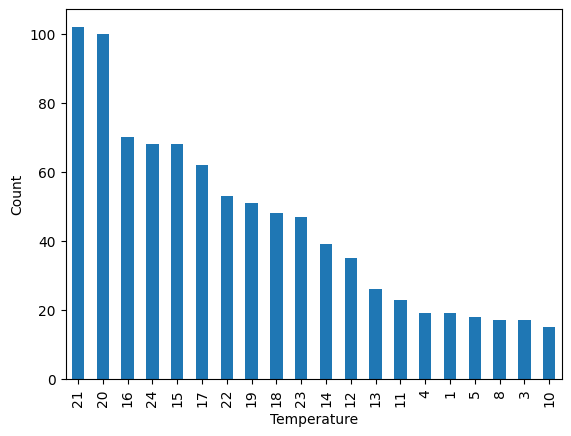

In [75]:
ax = df['Temperature'].value_counts().head(20).plot(kind='bar')
ax.set_ylabel('Count')
plt.show()

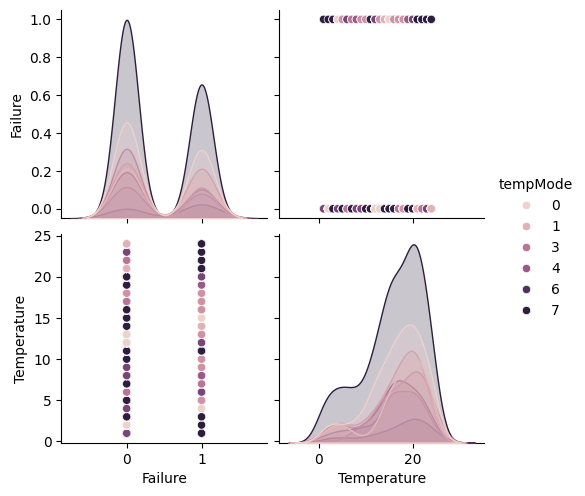

In [91]:
ax = sns.pairplot(vars=['Failure', 'Temperature'], data=df, hue='tempMode')
plt.show()